# Introduction Data Science

* **literature**: Wes McKenney: Python for Data Analysis Chapter 2
    * In the literature folder
* Accompanying notebook: <https://github.com/pydata/pydata-book> (also locally in our Notebook folder)

## Data Science "steps"

* “Interacting with the outside world
    * Reading and writing with a variety of file formats and databases.
* Preparation
    * Cleaning, munging, combining, normalizing, reshaping, slicing and dicing, and transforming data for analysis.
* Transformation
    * Applying mathematical and statistical operations to groups of data sets to derive new data sets. 
    * For example, aggregating a large table by group variables.
* Modeling and computation
    * Connecting your data to statistical models, machine learning algorithms, or other computational tools
* Presentation
    * Creating interactive or static graphical visualizations or textual summaries”

Excerpt From: Wes McKinney. “Python for Data Analysis.”

### Python
* Python is great for data science, as it let you do all these steps inside one programming framework.
* Using notebooks, you can in fact do all these steps inside one notebook for a small project. 

# 3 examples

* We go through 3 examples from Chapter 2, highlighting what can be done in pandas.

### Examples

1. usa.gov data
    * reading JSON format
    * data cleaning
    * "Who looks at .gov sites?" : counting time zones
3. Movielens
    * SQL join
    * pivot tables
2. Baby names
    * concatenating data files
    * more pivots

# usa.gov data

* More information: <https://github.com/usagov/1.USA.gov-Data>
* Follow the code in the notebook

## Schema (i.e. json data dictionary):
```
{
        "a": USER_AGENT, 
        "c": COUNTRY_CODE, # 2-character iso code
        "nk": KNOWN_USER,  # 1 or 0\. 0=this is the first time we've seen this browser
        "g": GLOBAL_BITLY_HASH, 
        "h": ENCODING_USER_BITLY_HASH,
        "l": ENCODING_USER_LOGIN,
        "hh": SHORT_URL_CNAME,
        "r": REFERRING_URL,
        "u": LONG_URL,
        "t": TIMESTAMP,
        "gr": GEO_REGION,
        "ll": [LATITUDE, LONGITUDE],
        "cy": GEO_CITY_NAME,
        "tz": TIMEZONE # in http://en.wikipedia.org/wiki/Zoneinfo format
        "hc": TIMESTAMP OF TIME HASH WAS CREATED, 
        "al": ACCEPT_LANGUAGE http://www.w3.org/Protocols/rfc2616/rfc2616-sec14.html#sec14.4 
    }
```

# Exercise

```
records = [json.loads(line) for line in open(path)]  # list comprehension!
```

1. What kind of object is `records`?
    * Describe it as clearly as possible
2. Give code for the following:
    1. How many records are there?
    2. Make a list of  the  different cities are mentioned in the data?
        1. How often is each city mentioned (histogram)?
    3. Remove all fields in the records except "c" and "tz", and rename these to `COUNTRY_CODE` and `TIMEZONE`.

# Answers

In [1]:
import json
path = '/Users/admin/Documents/work/onderwijs/teaching/ISatWork/NoteBooks/pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]  # list comprehension!

IOError: [Errno 2] No such file or directory: '/Users/admin/Documents/work/onderwijs/teaching/ISatWork/NoteBooks/pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [2]:
print len(records)

3560


In [28]:
# The first item in records: He' this looks like a row in a spreadsheet!
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [3]:
cities= [r['cy'] for r in records if 'cy' in r] # note the test whether the field exists. This is JSON= semi structured data
print cities[:3], len(cities)

[u'Danvers', u'Provo', u'Washington'] 2919


In [4]:
from collections import Counter

cities= Counter(cities)
cities.most_common(10)

[(u'Provo', 121),
 (u'White Plains', 104),
 (u'Washington', 98),
 (u'Palo Alto', 68),
 (u'Shrewsbury', 46),
 (u'Acworth', 38),
 (u'Dallas', 33),
 (u'Paramus', 32),
 (u'Nogata', 29),
 (u'Los Angeles', 28)]

In [2]:
import pandas as pd
%matplotlib inline

cit= pd.DataFrame.from_dict(cities, orient='index')  # maak er een spreadsheet van
cit.columns=['aantal']  # geef de kolom een naam
cit.sort_values('aantal',ascending=False, inplace=True)  # sorteer
cit.head() # laat de top van het spreadsheet zien

NameError: name 'cities' is not defined

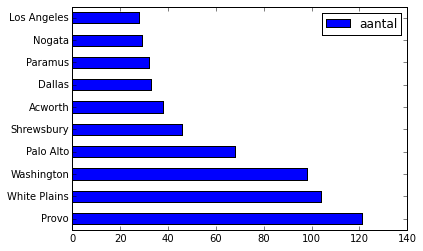

In [26]:
cit.head(10).plot(kind='barh');

In [27]:
# Remove all fields in the records except "c" and "tz", and rename these to COUNTRY_CODE and TIMEZONE.
short_records= [ {'COUNTRY_CODE': r['c'], 'TIMEZONE': r['tz']} for r in records if 'tz' in r and 'c' in r]
short_records[:4]

[{'COUNTRY_CODE': u'US', 'TIMEZONE': u'America/New_York'},
 {'COUNTRY_CODE': u'US', 'TIMEZONE': u'America/Denver'},
 {'COUNTRY_CODE': u'US', 'TIMEZONE': u'America/New_York'},
 {'COUNTRY_CODE': u'BR', 'TIMEZONE': u'America/Sao_Paulo'}]

# Exercise

* From the book. 
* The book has several solutions.
* Count how often each time zone occurs in the data.

In [10]:
time_zones= Counter([r['tz'] for r in records if 'tz' in r])
time_zones.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

# Same question solved in pandas

In [11]:
%matplotlib inline
import pandas as pd

# load the records as a dataframe, and show the first 10 "lines"
frame = pd.DataFrame(records)
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [12]:
tz_counts = frame.tz.value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

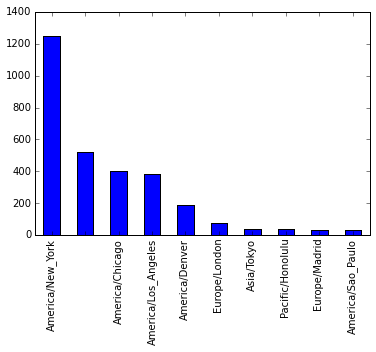

In [13]:
tz_counts[:10].plot(kind='bar'); # or try barh

 # Almost the same exercise....
 
 * Make the same histogram, but now for the browsers used in the data.
 
 ### steps
 1. Inspect the data
 2. Clean it up, using Python's string manipulation.
 3. remove missing values
 4. turm into a dataframe (now actually series) pandas object and act as before

In [14]:
# Ispect the data
frame.a.head()
 

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

# Remove missing values


In [15]:
len(frame.a), len(frame.a.dropna()), len(frame.a)

(3560, 3440, 3560)

# Only keep the operating system
* Python can split strings easily! 

In [16]:
opssys= [r.split()[0] for r in frame.a.dropna() ]
opssys[:5]

[u'Mozilla/5.0',
 u'GoogleMaps/RochesterNY',
 u'Mozilla/4.0',
 u'Mozilla/5.0',
 u'Mozilla/5.0']

# Back to pandas

In [17]:
opssys_series = pd.Series(opssys)
opssys_series.value_counts()[:10] # .plot(type='barh')

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

# Movielens data

1. Merging/joining/fusing csv files
2. Favorite movies grouped by gender

# Step 1

* inspect your data files using command line tools

In [30]:
# How big?   
# only works for mac and linux
!ls -lh ../NoteBooks/pydata-book/ch02/movielens/

total 196136
-rw-r--r--  1 admin  staff   5.1K Jan 14  2015 README
-rw-r--r--  1 admin  staff    72M Jan 28 11:49 mergeddata.csv
-rw-r--r--  1 admin  staff   167K Jan 14  2015 movies.dat
-rw-r--r--  1 admin  staff    23M Jan 14  2015 ratings.dat
-rw-r--r--  1 admin  staff   131K Jan 14  2015 users.dat


In [31]:
# also works for windows. 
# Can you spot the difference?
# only works for mac and linux
%ls -lh ../NoteBooks/pydata-book/ch02/movielens/

total 196136
-rw-r--r--  1 admin  staff   5.1K Jan 14  2015 README
-rw-r--r--  1 admin  staff    72M Jan 28 11:49 mergeddata.csv
-rw-r--r--  1 admin  staff   167K Jan 14  2015 movies.dat
-rw-r--r--  1 admin  staff    23M Jan 14  2015 ratings.dat
-rw-r--r--  1 admin  staff   131K Jan 14  2015 users.dat


In [33]:
# How many lines?
!wc -l ../NoteBooks/pydata-book/ch02/movielens/*.dat

    3883 ../NoteBooks/pydata-book/ch02/movielens/movies.dat
 1000209 ../NoteBooks/pydata-book/ch02/movielens/ratings.dat
    6040 ../NoteBooks/pydata-book/ch02/movielens/users.dat
 1010132 total


In [35]:
# Show the top 5 lines 

!head -5 ../NoteBooks/pydata-book/ch02/movielens/*.dat

==> ../NoteBooks/pydata-book/ch02/movielens/movies.dat <==
1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the Bride Part II (1995)::Comedy

==> ../NoteBooks/pydata-book/ch02/movielens/ratings.dat <==
1::1193::5::978300760
1::661::3::978302109
1::914::3::978301968
1::3408::4::978300275
1::2355::5::978824291

==> ../NoteBooks/pydata-book/ch02/movielens/users.dat <==
1::F::1::10::48067
2::M::56::16::70072
3::M::25::15::55117
4::M::45::7::02460
5::M::25::20::55455


# Step 2

* Understand technical format
    * csv files separated by '::' in `latin1` encoding
* Understand semantics
    * What do the values in the columns mean?
    * Here hard, as there are no headers.
    
## Then import into pandas
* use `pd.read_csv`

In [37]:
import os
# import pandas as pd
encoding = 'latin1'

 
upath = os.path.expanduser('../NoteBooks/pydata-book/ch02/movielens/users.dat')
rpath = os.path.expanduser('../NoteBooks/pydata-book/ch02/movielens/ratings.dat')
mpath = os.path.expanduser('../NoteBooks/pydata-book/ch02/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding, engine='python')

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


# Inspect your data

In [22]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [23]:
ratings.describe()

,user_id,movie_id,rating,timestamp
count,1000209.000000,1000209.000000,1000209.000000,1.000209e+06
mean,3024.512348,1865.539898,3.581564,9.722437e+08
std,1728.412695,1096.040689,1.117102,1.215256e+07
min,1.000000,1.000000,1.000000,9.567039e+08
25%,1506.000000,1030.000000,3.000000,9.653026e+08
50%,3070.000000,1835.000000,4.000000,9.730180e+08
75%,4476.000000,2770.000000,4.000000,9.752209e+08
max,6040.000000,3952.000000,5.000000,1.046455e+09


# Now merge

* `pd.merge?`
    * Do a join on the shared column names
* Default is SQL's inner join:
    * use intersection of join-values from both frames (SQL: inner join) 


In [24]:
pd.merge(movies,ratings).head()

,movie_id,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [38]:
data = pd.merge(pd.merge(movies, ratings ), users)
data.head()

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [40]:
## Write this dataframe to a csv file
# http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.to_csv.html

data.to_csv('../NoteBooks/pydata-book/ch02/movielens/mergeddata.csv', index=False)
!wc -l '../NoteBooks/pydata-book/ch02/movielens/mergeddata.csv';

 1000210 ../NoteBooks/pydata-book/ch02/movielens/mergeddata.csv


In [41]:
!head -5 '../NoteBooks/pydata-book/ch02/movielens/mergeddata.csv'

movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip
1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067


# Analysis

* See <http://nbviewer.ipython.org/url/maartenmarx.nl/teaching/Proefstuderen/NoteBooks/Movielens_data.ipynb>
* Notebook: <http://maartenmarx.nl/teaching/Proefstuderen/NoteBooks/Movielens_data.ipynb>

# Chapter 2: analyse baby names

Fantastic diachronic dataset: 1880-2010 
```
“       name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880
5   Margaret   F    1578  1880
6        Ida   F    1472  1880
7      Alice   F    1414  1880
8     Bertha   F    1320  1880
9      Sarah   F    1288  1880”
```

# Chapter 2: analyse baby names

1. Import data
    * niet zo makkelijk, want verspreid over een csv file voor elk jaar
2. Analyse

### Voorbeeld vragen

* Visualize the proportion of babies given a particular name (your own, or another name) over time.
* Determine the relative rank of a name.
* Determine the most popular names in each year or the names with largest increases or decreases.
* Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters
* Analyze external sources of trends: biblical names, celebrities, demographic changes 
 

# Import data

* Each file has the same 3 columns: `name sex  births `
* So, we can add an extra column `year` 
    * with a constant value for each file
* and just concatenate all files
    * we could do that at the file level,
    * but also in pandas using `pd.concat`

In [42]:
# Inspect one file
import pandas as pd
names1880 = pd.read_csv('../NoteBooks/pydata-book/ch02/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [43]:
# Concatenate them all
# 2010 is the last available year right now
years = range(1880,  2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = '../NoteBooks/pydata-book/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [29]:
# check
names.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


# Exercise

> How many unique names are there in this dataset?

In [30]:
len(names.name), len(set(names.name))

(1690784, 88496)

# Exercise

> Compute and show the number of births per year per gender.

### What are the operations you must perform?

* pivot table with 
    * year as index
    * gender as column
    * sum of all births as value

In [46]:
# in the book 
#total_births = names.pivot_table('births', rows='year',cols='sex', aggfunc=sum)

# new syntx: see names.pivot_table?
total_births = names.pivot_table(values='births', index='year',columns='sex', aggfunc=sum, margins=True)
total_births.tail()                                 

sex,F,M,All
year,,,
2007,1916888,2069242,3986130
2008,1883645,2032310,3915955
2009,1827643,1973359,3801002
2010,1759010,1898382,3657392
All,159990140,162412587,322402727


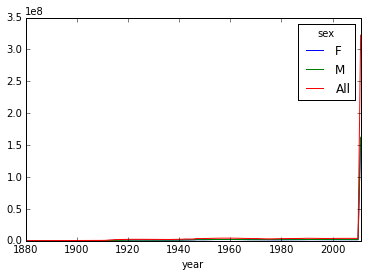

In [47]:
# What went wrong here?
total_births.plot();

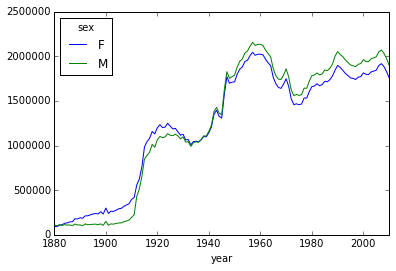

In [48]:
total_births = names.pivot_table(values='births', index='year',columns='sex', aggfunc=sum)
total_births.plot();

# Exercise

* Print the number of Johns per year.
* Print two plots John and Mary per year


In [33]:
# What were the names of the columns again?

names.head(3)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880


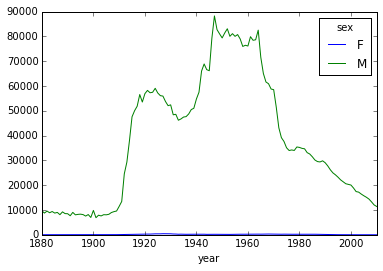

In [34]:
# restrict to the rows we want
john=names[names.name=='John']

# Do what we did before 
john.pivot_table(values='births', index='year',columns='sex', aggfunc=sum).plot();

In [51]:
# multiple plots
# See http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing 

subset = names[(names.name=='John') |  (  names.name== 'Mary')]  # | = or ; & = and; ~ = not

subset.head()

,name,sex,births,year
0,Mary,F,7065,1880
228,John,F,46,1880
942,John,M,9655,1880
1273,Mary,M,27,1880
2000,Mary,F,6919,1881


In [54]:
# Now pivot on year and name
johnandmary= subset.pivot_table(values='births', columns='name' ,index='year',  aggfunc=sum)
johnandmary.head(2)

name,John,Mary
year,,
1880,9701,7092
1881,8795,6948


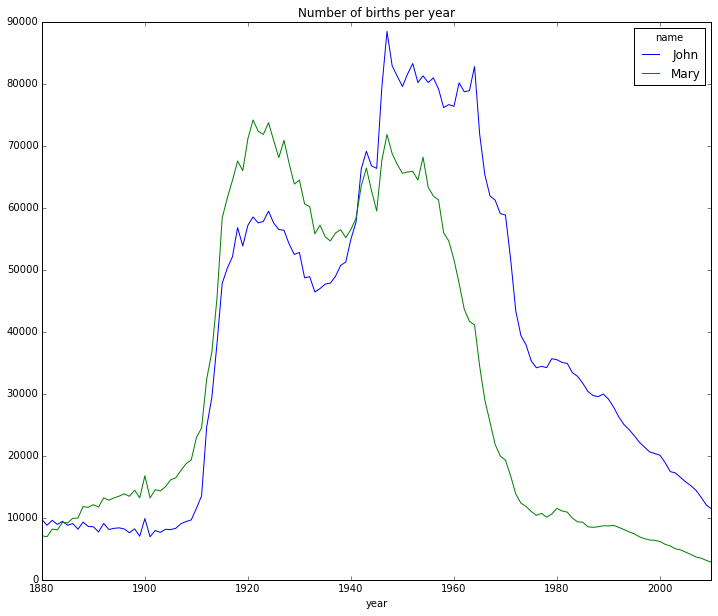

In [36]:
johnandmary.plot( figsize=(12, 10), grid=False  , # subplots=True,
            title="Number of births per year")

## Exercise

* Plot the percentage of Johns and Maries per year.

### Hint
* compute the totals for each year
* Define a  new column percentage by dividing by the totals.

In [84]:
# Step 1: get the totals 
p= names.pivot_table(values='births', columns='name' ,index='year',  aggfunc=sum, margins=True)
p.head()

name,Aaban,Aabid,Aabriella,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zysean,Zyshaun,Zyshawn,Zyshon,Zyshonne,Zytavious,Zyvion,Zyyanna,Zzyzx,All
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201486
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192703
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221538
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216954
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243466


In [85]:
# Step 2: percentages
((p.John /p.All)*100).head()

year
1880    4.814727
1881    4.564018
1882    4.331988
1883    4.117924
1884    3.871999
dtype: float64

In [86]:
# nicely round them
((p.John /p.All)*100).apply(lambda x:round(x,2)).head()

year
1880    4.81
1881    4.56
1882    4.33
1883    4.12
1884    3.87
dtype: float64

In [72]:
# OK , let's do that for all names in place

for name in p.columns:
    p[name]= ((p[name] /p.All)*100).apply(lambda x:round(x,2))


In [73]:
p.John.head()

year
1880    4.81
1881    4.56
1882    4.33
1883    4.12
1884    3.87
Name: John, dtype: float64

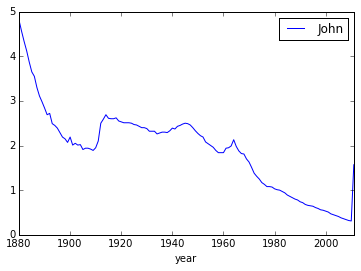

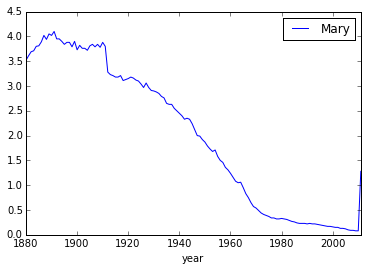

In [77]:
pd.DataFrame(p.John).plot()
pd.DataFrame(p.Mary).plot()

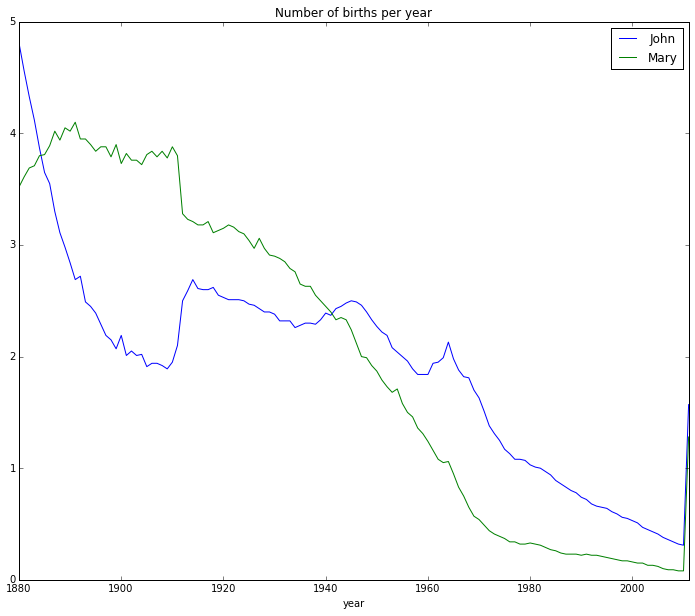

In [80]:
(pd.DataFrame(p.John).join(p.Mary)).plot(figsize=(12, 10), grid=False  , # subplots=True,
            title="Number of births per year")

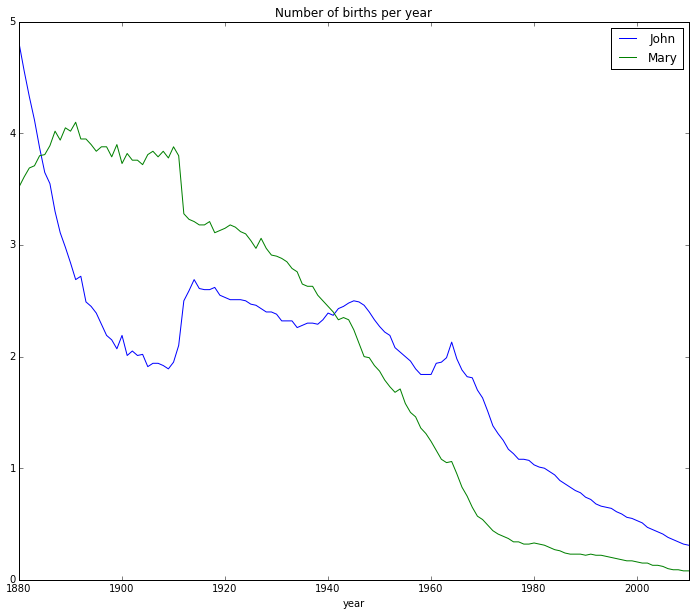

In [81]:
# get rid of that anomaly at the right

(pd.DataFrame(p.John).join(p.Mary).drop('All')).plot(figsize=(12, 10), grid=False  , # subplots=True,
            title="Number of births per year")

# Female Johns and Male Mary's?

* really, let's check that out

In [37]:
femalejohns= names[(names.name=='John') & (names.sex=='F')]
femalejohns.sort('births', ascending=False).head()

,name,sex,births,year
244765,John,F,439,1927
255176,John,F,424,1928
265335,John,F,411,1929
275153,John,F,401,1930
234322,John,F,387,1926


# Store femalejohns

* as a csv file

In [56]:
femalejohns.to_csv('femalejohns.csv', index=False, sep='\t')

In [57]:
! head -10 femalejohns.csv

name	sex	births	year
John	F	46	1880
John	F	26	1881
John	F	40	1882
John	F	40	1883
John	F	40	1884
John	F	45	1885
John	F	48	1886
John	F	56	1887
John	F	52	1888


# Exercise (huiswerk)

* Vind voor elke naam het totaal aantal jongens en het totaal aantal meisjes met die naam
* Dit is natuurlijk weer een pivot table
* We willen ook de totalen erbij